# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 123 ms, sys: 40.9 ms, total: 164 ms
Wall time: 261 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

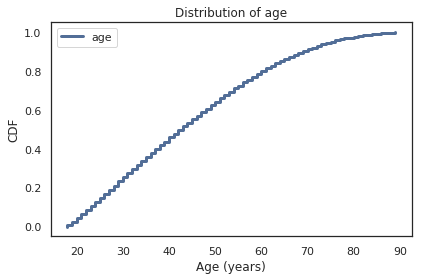

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: The distribution of ages does not follow a normal distribution. Part of this may be because respondents cannot be below a certain age, as it appears the youngest respondent to the gss survey was 18 years old. Though this may skew the model, we also know that people age at the same rate, which may contribute to the linear nature of the cdf.

In [9]:
gss.age.min()

18.0

n, mean, std 62281 44.47905368874617 16.482037485676


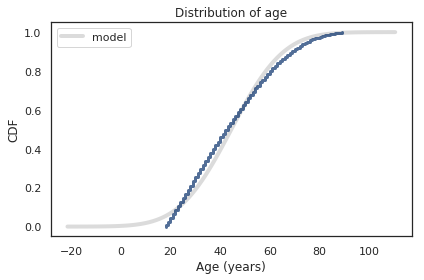

In [8]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: The age distribution somewhat follows the model around the mean, but deviates in the tails. The model describes the data decently within a standard deviation or two of the mean, but poorly elsewhere. As a result, I would say this data is not described by a normal distribution.

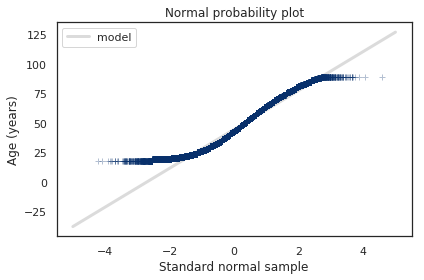

In [11]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: The data is not described by an exponential distribution, because if it were, the CCDF would show a straight line.

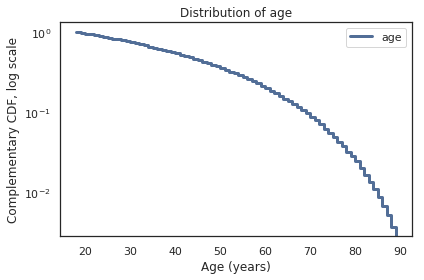

In [12]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: If this plot were a sinusoid, it would show that that the distribution was lognormal. The plot appears somewhat sinusoidal, so unless I find a better fit for the distribution later, I would not rule this out as describing the distribution of ages. However, it is by no means a perfect fit for a lognormal distribution.

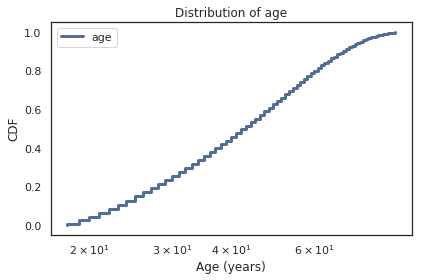

In [14]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: Since the CDF of the lognormal distribution is the same as the CDF of the normal distribution, with logx substituted for x, this plot shows whether or not the distribution of ages is lognormal. Again, this plot should be sinusoidal, but is not quite. It may be that a lognormal distribution is our best choice of the distributions we are currently checking for, but the data is by no means entirely lognormal.

n, mean, std 62281 1.6168744157503179 0.16787914328916784


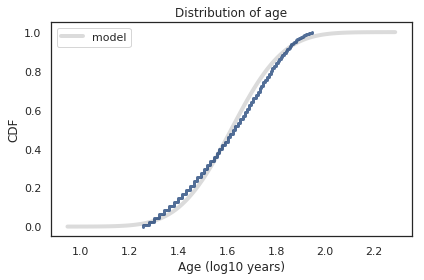

In [16]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: The age distribution somewhat follows the model around the mean, but deviates in the tails. The model describes the data decently within a standard deviation or two of the mean, but poorly elsewhere. This seems to be approximately as accurate as the normal probability plot for the ages. As a result, this plot does not provide too much additional detail. The fact that the plot is not a straight line indicates that distribution is not entirely lognormal.

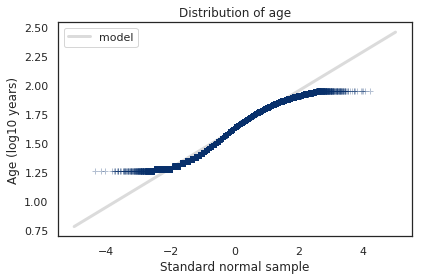

In [18]:
MakeNormalPlot(np.log10(gss.age.dropna()), label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: If any part of this distribution followed a straight line, it would tell us that this distribution could be modeled with a Pareto distribution. Because no part of it does follow a straight line, though, the distribution is not a Pareto distribution.

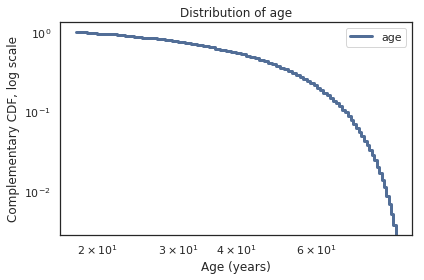

In [19]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: The distribution does not follow a straight line on this scale, so it is not a Weibull distribution.

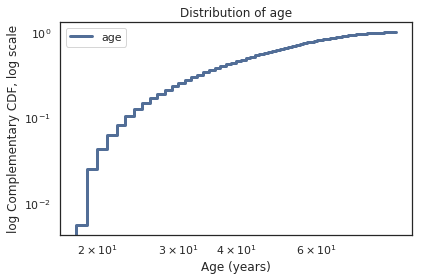

In [20]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

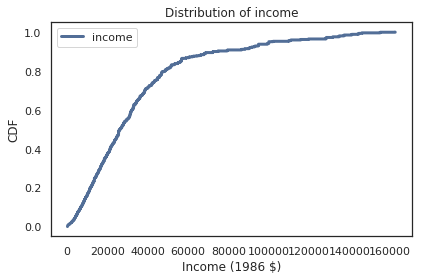

In [21]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

n, mean, std 55499 33882.52181307481 28502.895120969348


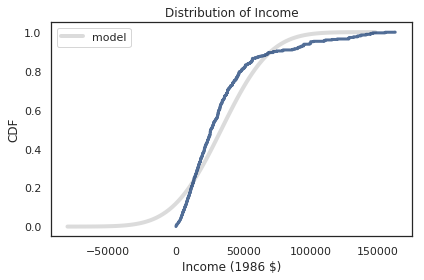

In [22]:
MakeNormalModel(gss.realinc.dropna(), label='')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

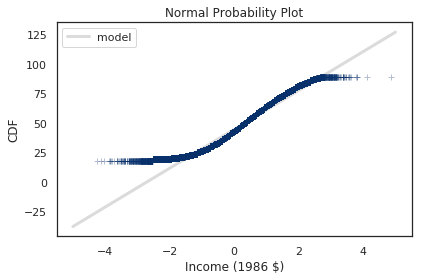

In [23]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal Probability Plot', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

3) Here's the complementary CDF on a log-y scale.

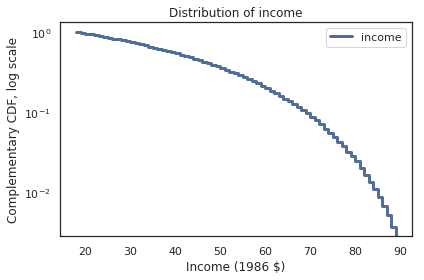

In [24]:
thinkplot.cdf(cdf_age, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

This plot indicates to me that around the mean, the distribution can be represented as a lognormal distribution.

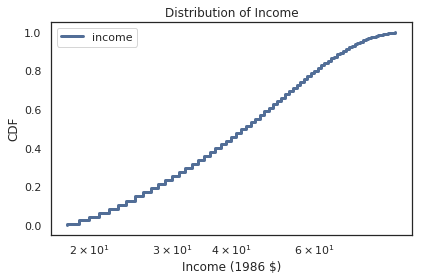

In [25]:
thinkplot.cdf(cdf_age, label='income')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 62281 1.6168744157503179 0.16787914328916784


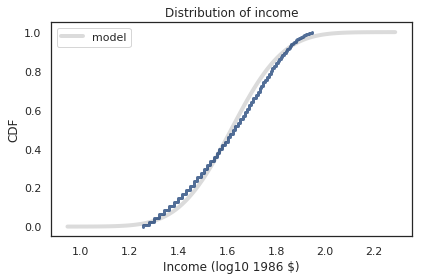

In [26]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of income', 
         xlabel='Income (log10 1986 $)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

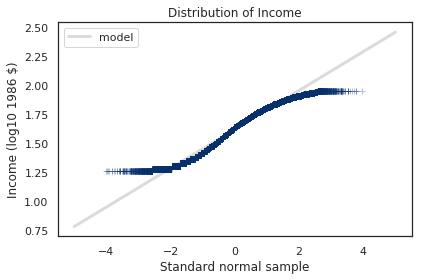

In [27]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of Income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10 1986 $)')

7) Here's the complementary CDF on a log-log scale.

The tails of this vaguely seem like they follow straight lines, so the tails could possibly be represented by a Pareto distribution. I'd say for portions of the distribution, this is the best option.

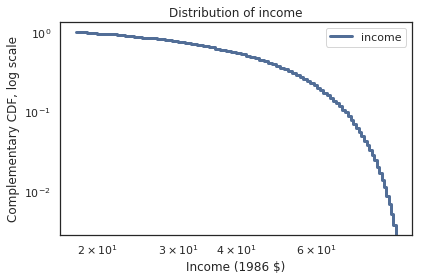

In [28]:
thinkplot.cdf(cdf_age, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

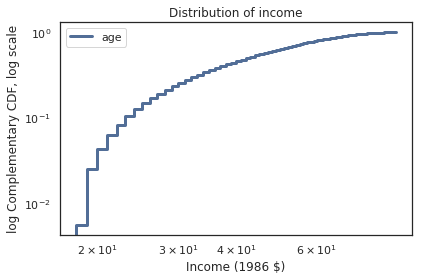

In [29]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [33]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 9.34 ms, sys: 36 µs, total: 9.38 ms
Wall time: 17.1 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


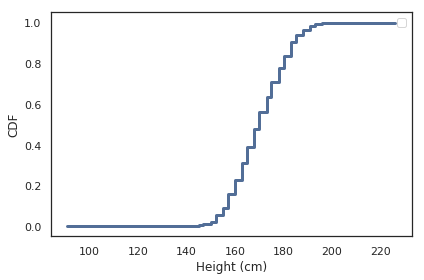

In [34]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [40]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

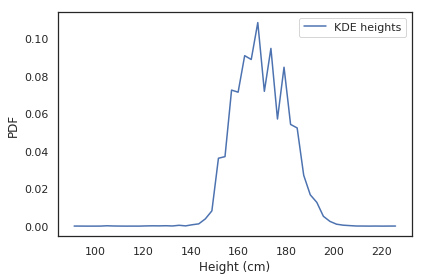

In [41]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

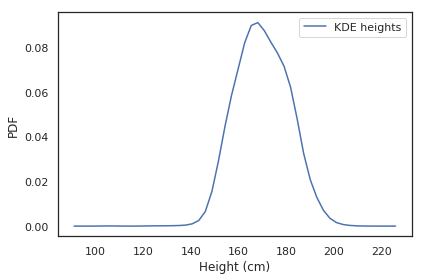

In [42]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [43]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

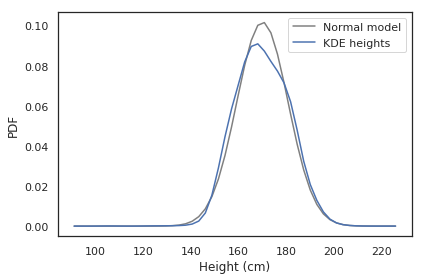

In [44]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

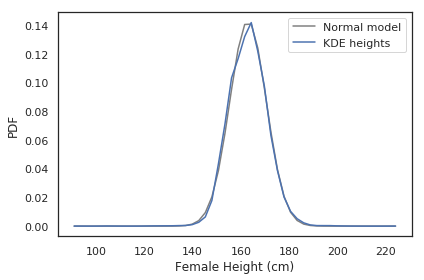

In [45]:
fem_heights = brfss[brfss.SEX == 2.0].HTM4
kde = gaussian_kde(fem_heights.dropna(), bw_method=0.3)

xs = np.linspace(fem_heights.min(), fem_heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = fem_heights.mean()
std = fem_heights.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Female Height (cm)', ylabel='PDF')

The normal model does better for female heights than for the heights of all respondents.

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

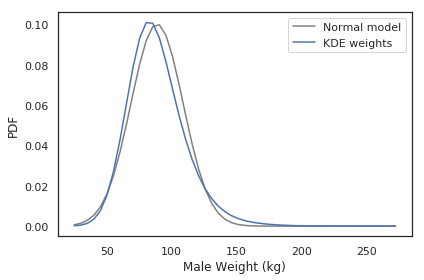

In [46]:
men_weights = brfss[brfss.SEX == 1].WTKG3
kde = gaussian_kde(men_weights.dropna(), bw_method=0.5)
xs = np.linspace(men_weights.min(), men_weights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = men_weights.mean()
std = men_weights.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')
decorate(xlabel='Male Weight (kg)', ylabel='PDF')

The normal model fits the data reasonably well, although it is a bit shifted to the right of the kernel density estimation.

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

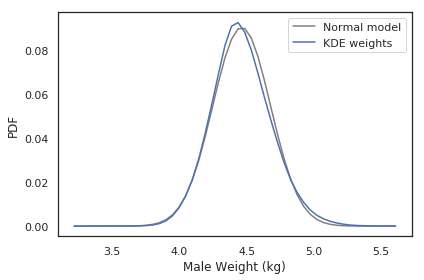

In [54]:
men_weights = np.log(brfss[brfss.SEX == 1].WTKG3)
kde = gaussian_kde(men_weights.dropna(), bw_method=0.3)
xs = np.linspace(men_weights.min(), men_weights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = men_weights.mean()
std = men_weights.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')
decorate(xlabel='Male Weight (kg)', ylabel='PDF')

The normal model fits a bit better with the log of men's weights than with men's weights. This implies that the distribution of men's weights follows a lognormal, rather than normal, distribution.

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [47]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [48]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [49]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [50]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [51]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [52]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [53]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [54]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

The distribution of female weights is slightly more skewed than the distribution of male weights.

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

First, I'd like to mention that we should go through the process of downloading datasets in class. I tried everything to download data from the gss and brfss datasets besides the variable provided and kept running into issues converting them to pandas dataframes. Every time I tried to read them I got a different error.

In [83]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', 'AGE'], dtype='object')

In [76]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()

CPU times: user 8.43 ms, sys: 16.7 ms, total: 25.2 ms
Wall time: 24.7 ms


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


In [85]:
gss.columns.values

array(['year', 'id_', 'agewed', 'divorce', 'sibs', 'childs', 'age',
       'educ', 'paeduc', 'maeduc', 'speduc', 'degree', 'padeg', 'madeg',
       'spdeg', 'sex', 'race', 'res16', 'reg16', 'srcbelt', 'partyid',
       'pres04', 'pres08', 'pres12', 'polviews', 'natspac', 'natenvir',
       'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace',
       'natarms', 'nataid', 'natfare', 'spkath', 'colath', 'libath',
       'spkhomo', 'colhomo', 'libhomo', 'cappun', 'gunlaw', 'grass',
       'relig', 'fund', 'attend', 'reliten', 'postlife', 'pray',
       'relig16', 'fund16', 'sprel16', 'prayer', 'bible', 'racmar',
       'racpres', 'affrmact', 'happy', 'hapmar', 'health', 'life',
       'helpful', 'fair', 'trust', 'conclerg', 'coneduc', 'confed',
       'conpress', 'conjudge', 'conlegis', 'conarmy', 'satjob', 'class_',
       'satfin', 'finrela', 'union_', 'fepol', 'abany', 'chldidel',
       'sexeduc', 'premarsx', 'xmarsex', 'homosex', 'spanking', 'fear',
       'owngun', 'pist

In [93]:
gss.health.replace([8, 9, 0], np.nan, inplace=True) 
gss.owngun.replace([8, 9, 0], np.nan, inplace=True) 
gss.reliten.replace([8, 9, 0], np.nan, inplace=True)
gss.paeduc.replace([97,98,99], np.nan, inplace=True) 
gss.maeduc.replace([97,98,99], np.nan, inplace=True) 

In [96]:
healthy = (gss.health == 1)

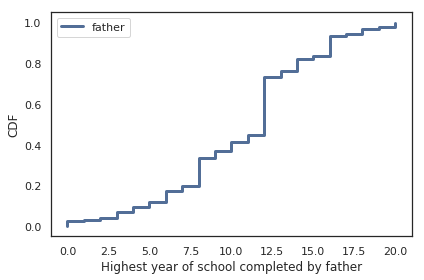

In [118]:
cdf_paeduc = Cdf(gss.paeduc, label='father')
thinkplot.Cdf(cdf_paeduc)

decorate(xlabel='Highest year of school completed by father', ylabel='CDF')

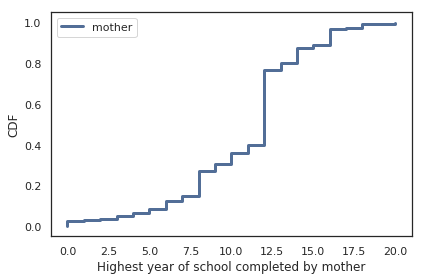

In [117]:
cdf_maeduc = Cdf(gss.maeduc, label='mother')
thinkplot.Cdf(cdf_maeduc)

decorate(xlabel='Highest year of school completed by mother', ylabel='CDF')

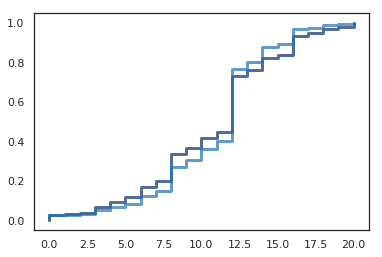

In [100]:
thinkplot.Cdfs([cdf_paeduc,cdf_maeduc])

In [109]:
nogun = gss[gss.owngun == 2]
gun = gss[gss.owngun == 1]
gun.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
1613,1973,1361,0,0,5,0,44.0,6.0,4.0,NaN,...,0,14415.0,1929.0,0,0,1.3717,3.0,0,0,1.0
1617,1973,1011,23,2,3,2,53.0,16.0,14.0,16.0,...,0,58970.0,1920.0,1943,0,0.9145,2.0,0,0,1.0
1618,1973,183,22,2,0,3,31.0,12.0,12.0,12.0,...,0,32761.0,1942.0,1964,0,0.9145,2.0,0,0,1.0
1620,1973,1239,21,2,1,1,24.0,12.0,8.0,3.0,...,0,19657.0,1949.0,1970,0,0.9145,2.0,0,0,1.0
1622,1973,664,20,2,4,4,48.0,12.0,16.0,NaN,...,0,93210.0,1925.0,1945,0,0.9145,2.0,0,0,1.0


Testing parent's education level vs. gun ownership

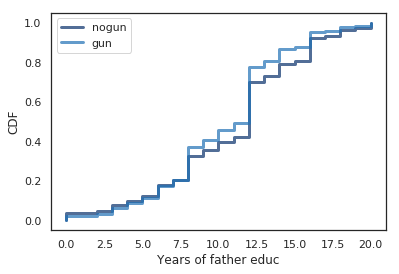

<Figure size 576x432 with 0 Axes>

In [119]:
cdf_paeduc_nogun = Cdf(nogun.paeduc, label='nogun')
cdf_paeduc_gun = Cdf(gun.paeduc, label='gun')
thinkplot.Cdfs([cdf_paeduc_nogun,cdf_paeduc_gun])
thinkplot.Show(xlabel='Years of father educ', ylabel='CDF')

In [122]:
gun.paeduc.mean(), nogun.paeduc.mean()

(10.357148597605079, 10.86732283464567)

Honestly not a whole lot of difference, let's try mothers.

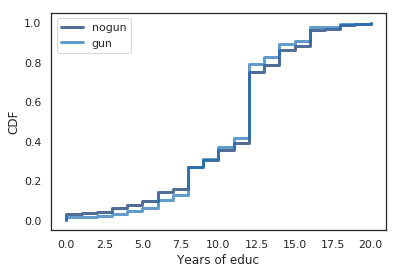

<Figure size 576x432 with 0 Axes>

In [120]:
cdf_maeduc_nogun = Cdf(nogun.maeduc, label='nogun')
cdf_maeduc_gun = Cdf(gun.maeduc, label='gun')
thinkplot.Cdfs([cdf_maeduc_nogun,cdf_maeduc_gun])
thinkplot.Show(xlabel='Years of educ', ylabel='CDF')

Not much difference here either, let's test the respondents themselves

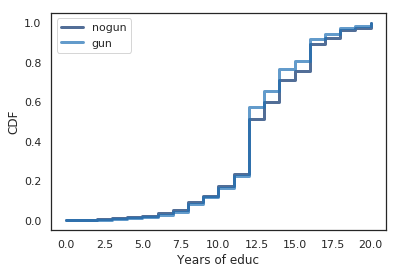

<Figure size 576x432 with 0 Axes>

In [124]:
cdf_educ_nogun = Cdf(nogun.educ, label='nogun')
cdf_educ_gun = Cdf(gun.educ, label='gun')
thinkplot.Cdfs([cdf_educ_nogun,cdf_educ_gun])
thinkplot.Show(xlabel='Years of educ', ylabel='CDF')

No difference, again. Slight differences in each, feels like I might be able to extract something out of the differences if I wanted but nothing to note here really.

In [150]:
healthy = gss[gss.health == 1]
good = gss[gss.health == 2]
fair = gss[gss.health == 3]
poor = gss[gss.health == 4]

We'll test health vs. education level

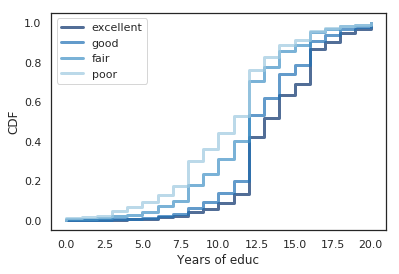

<Figure size 576x432 with 0 Axes>

In [151]:
healthycdf = Cdf(health.educ, label='excellent')
goodcdf = Cdf(good.educ, label='good')
faircdf = Cdf(fair.educ, label='fair')
poorcdf = Cdf(poor.educ, label='poor')
thinkplot.Cdfs([healthycdf, goodcdf, faircdf, poorcdf])
thinkplot.Show(xlabel='Years of educ', ylabel='CDF')

Now, I might be making this up, but that looks interesting. Might be something here. Let's see just excellent and poor health.

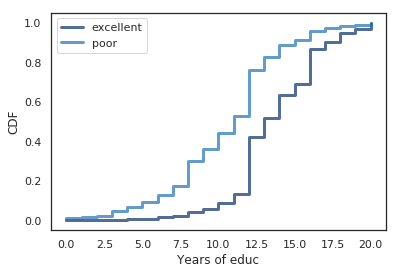

<Figure size 576x432 with 0 Axes>

In [152]:
thinkplot.Cdfs([healthycdf, poorcdf])
thinkplot.Show(xlabel='Years of educ', ylabel='CDF')

Yeah, that's something. That's a big difference. It appears that people who are healthier get significantly more education/people that are more educated are healthier. Let's get some basic statistics.

In [153]:
healthy.educ.mean(), poor.educ.mean()

(13.666969147005444, 10.513240857503153)

In [154]:
healthy.educ.std(), poor.educ.std()

(2.8849263397985054, 3.689957099325788)

Seems like there's a big difference there. This would be interesting to look into, initially I went ahead and made plots to check for normal distributions for each group below, then realized that both groups seemed to follow the same distributions, so I just went back and did it for general education levels. 

n, mean, std 62304 12.868551213600183 2.8595560887321954


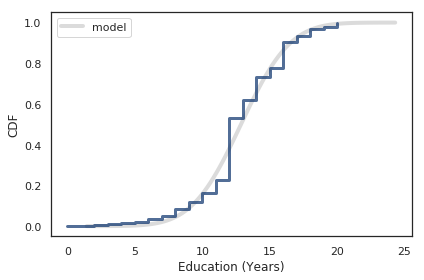

In [165]:
MakeNormalModel(gss.educ.dropna(), label='')

decorate( xlabel='Education (Years)', 
         ylabel='CDF')

n, mean, std 62304 12.868551213600183 2.8595560887321954


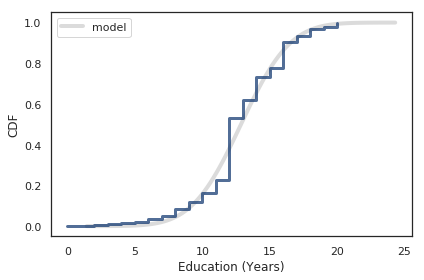

In [166]:
MakeNormalModel(gss.educ.dropna(), label='')

decorate( xlabel='Education (Years)', 
         ylabel='CDF')

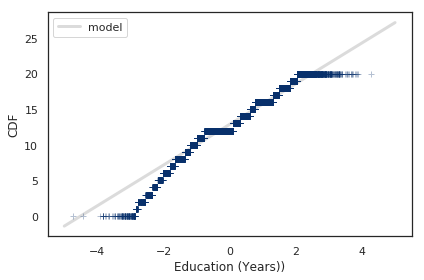

In [167]:
MakeNormalPlot(gss.educ.dropna(), label='')

decorate( xlabel='Education (Years))', 
         ylabel='CDF')

n, mean, std 62304 1.0973971951094332 0.10720094476521505


/home/dconnolly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


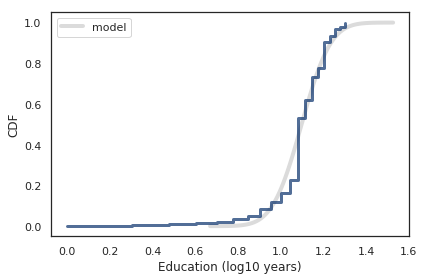

In [168]:
values = np.log10(gss.educ.dropna())
MakeNormalModel(values, label='')

decorate(xlabel='Education (log10 years)', 
         ylabel='CDF')

Honestly, this may either follow a normal or lognormal distribution.